In [ ]:
import pandas as pd
import pickle
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('../data/final_data.csv')
df.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,125.0,33.6,50,1
1,85.0,125.0,26.6,31,0
2,183.0,125.0,23.3,32,1
3,89.0,94.0,28.1,21,0
4,137.0,168.0,43.1,33,1


In [ ]:
df.tail()

,Glucose,Insulin,BMI,Age,Outcome
763,101.0,180.0,32.9,63,0
764,122.0,125.0,36.8,27,0
765,121.0,112.0,26.2,30,0
766,126.0,125.0,30.1,47,1
767,93.0,125.0,30.4,23,0


<Axes: xlabel='Outcome', ylabel='count'>

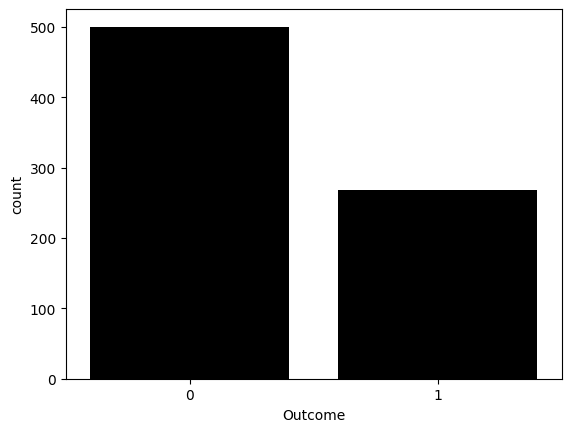

In [ ]:
# check for imbalancing
sns.countplot(x='Outcome', data=df, color='Black', stat='count')

Balancing Dataset

In [ ]:
# columns to train the model
final_columns = list(df.columns)[:-1]
# training dataset
x = df.drop(["Outcome"],axis = 1)
x.head()

In [ ]:
# target variable
y = df.Outcome
y

In [ ]:
# split dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

# Creating Classifiers

1. Random Forest
2. XGBoost
3. SVC
4. Naive Bayes

In [ ]:
# random forest
rfc = RandomForestClassifier(n_estimators=150, criterion='gini')
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7792207792207793
Classification report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        97
           1       0.70      0.70      0.70        57

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [ ]:
# xgboost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7662337662337663
Classification report
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.60      0.68      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.78      0.77      0.77       154



In [ ]:
# svm
svc_model = SVC(kernel="sigmoid")
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.37012987012987014
Classification report
               precision    recall  f1-score   support

           0       0.55      0.50      0.53       107
           1       0.05      0.06      0.06        47

    accuracy                           0.37       154
   macro avg       0.30      0.28      0.29       154
weighted avg       0.40      0.37      0.38       154



In [ ]:
# naive baise
nb_model = ComplementNB()
nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.5844155844155844
Classification report
               precision    recall  f1-score   support

           0       0.77      0.57      0.66       107
           1       0.39      0.62      0.48        47

    accuracy                           0.58       154
   macro avg       0.58      0.59      0.57       154
weighted avg       0.65      0.58      0.60       154



In [ ]:
X_test

,Glucose,Insulin,BMI,Age
661,199.0,125.0,42.9,22
122,107.0,100.0,33.6,23
113,76.0,125.0,34.0,25
14,166.0,175.0,25.8,51
529,111.0,125.0,24.6,31
...,...,...,...,...
476,105.0,191.0,33.7,29
482,85.0,49.0,27.8,28
230,142.0,125.0,44.0,22
527,116.0,105.0,26.3,24


In [ ]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
# Saving model
model = pickle.dumps(xgb_model)

In [ ]:
# making predictions
classifier = pickle.loads(model)
classifier.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# making predictions using custom input

classifier.predict([[148, 0, 33.6, 50]]) # patient0

array([1])

In [ ]:
classifier.predict([[89, 94, 28.1, 21]]) # patient3

array([0])

In [ ]:
classifier.predict([[101, 180, 32.9, 63]]) # patient

array([0])

In [ ]:
classifier.predict([[121, 112, 26.2, 30]]) # patient

array([0])

In [ ]:
model = pickle.dumps(rfc)
classifier = pickle.loads(model)
classifier.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# making predictions using custom input

classifier.predict([[148, 0, 33.6, 50]]) # patient0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
classifier.predict([[89, 94, 28.1, 21]]) # patient3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
classifier.predict([[101, 180, 32.9, 63]]) # patient

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
classifier.predict([[121, 112, 26.2, 30]]) # patient

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])